## Analysis of Species Assemblage in the Central California Surf Zone

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

import surfzone

### Introduction

The surf zone, the area extending from the first breaking waves to the shore, is characterized by high turbulence and often tumultuous conditions (McLachlan and Brown 2006; Olds et al. 2018). Yet, the surf zone is an important ecosystem for fish and invertebrate species (Layman 2000). It can serve as a nursery habitat by harboring fish species who spend their developmental juvenile stage in the shallow, protected waters (Ross and Lancaster 2002). By concentrating juvenile fish and many invertebrates, the surf zone also attracts mobile fish predators searching for prey (Layman 2000; Nakane et al. 2009) and shorebirds, which use beaches and the swash zone as important foraging grounds (Dugan et al. 2003). In addition to the critical ecosystem function provided, sandy beaches are among the most intensely used coastal habitats that provide cultural, recreational, and economic resources for humans (Dugan et al. 2010). One popular example of recreational use includes shoreline angling. Past studies have shown that direct harvest from sandy beaches can have detectable and negative impacts on the ecosystem (Bennett and Attwood 1991). Many resident species of the surf zone require adaptations to handle the turbid environment (Layman 2000), which minimizes functional redundancy within the ecosystem (Henderson et al. 2019). As such, once a species has been overharvested by an activity like fishing, there are limited competitors to fill that ecosystem role.


Oceanographic conditions heavily influence the Central Coast of California. These seasonal oceanographic changes cause drastic changes throughout the year. Summer has the calmest conditions, and the water temperature slowly rises (Ramp et al. 2011). Winter brings storms and high wave action, which uproot the kelp and transport this necessary subsidy into the surf zone as drift algae (Andrews 1945; Krumhansl and Scheibling 2012). Spring is accompanied by a high degree of upwelling and strong winds, bringing an excess of nutrients to the surface, which fertilize and stimulate primary producers (Thompson et al. 2012). Central California poses a unique environment exhibiting strong seasonal patterns driven by oceanographic processes. The combination of these factors set it up as an excellent system to investigate seasonality in the surf zone. Several studies have described seasonal changes in diversity and species composition in surf zones around the world (Ross et al. 1987; Layman 2000; Nanami and Endo 2007; Marin Jarrin et al. 2016); however, a recent review indicated that of the 152 studies investigating surf zone fishes, only four were conducted along the West Coast of the United States and none of those focused on the seasonal variability within the community (Olds et al. 2018). Because surf zones are such a challenging and dynamic system to study, little is known about how fish and invertebrate assemblages change throughout the seasonal cycle or how they are affected by environmental conditions.

### Question addressed in this notebook

*Are there specific environmental factors associated with spatial and temporal differences in surf zone assemblages?*

**Hypothesis:** Environmental factors will change seasonally and will be associated with spatial and temporal shifts in the species assemblage.  

*Rationale:* Seasonal changes in temperature, average wave height, current tide height, and depth will likely explain seasonal changes in surf zone assemblages. Other factors, such as wind speed, wave period, and visibility will likely have a less strong relationship with assemblage.

### Methods

Data was collected from eight sites around Monterey Bay once a month in July, August, and September of 2019 and 2020. The surf zone was sampled using purpose-built baited remote underwater video stations (BRUVS) which were deployed beyond the first line of breakers and left to record for one hour before being retrieved (Vargas‐Fonseca et al. 2016). During each sampling, six BRUVS were deployed to a depth of 2 deep and spaced 50 m apart from each other along the beach. Surf zone fish assemblages have been shown to change with time of day and tidal height (Beyst et al. 2002). To mitigate these differences, sampling will occur within a two-hour window straddling the daily low tide. In addition to the BRUVS, environmental data was collected for the sampling day. Depth, visibility, substate, and microhabitat were estimated by the person deploying the BRUVS; tide height data was retrieved from NOAA tide tables for Monterey; wind average was recorded with a hand-held anemometer; water temperature was recorded with a handheld thermometer; and, beaker height and period were estimated by a person standing at the low swash point on the beach. 

The video was analyzed in the EventMeasure program where the video is watched though fully and each species observed is recorded to the lowest taxonomic order. One of the outputs of this program is the MaxN metric, the maximum number of individuals of the same species seen in one frame of the video (Murphy and Jenkins 2010). This is a common metric used within BURVS as it prevents double counting individuals that may have dopped out of frame and returned. In addition to the MaxN metric, each hour long video was broken into 12 5-minute periods and the MaxN was calculated for each period. This allowed the average to be calculated for each species in each video and is a more accurate metric for abundance. 

### Import formatted data

Data was cleaned and formatted in the notebook surf_zone-data_formatting notebook which details the methods used to clean and create the dataset used for the rest of the analysis. 

In [2]:
#import the data
filename_bruv = 'Results/maxn_environmental_combined.csv'
df_merge = pd.read_csv(filename_bruv)
df_merge

,Date,Site,BRUV,Sci_Name,MaxN,MPA_Status,Tide_height_ft,Wind_Average_mph,Depth_ft,Visibility_ft,Temp_C,Substrate,Breaker_Height_m,Breaker_Period_s,Microhabitat
0,2019-07-09,Stillwater Cove,1,C. stigmaeus,0.333333,Ref,2.5,NaN,7.0,2.0,14.0,sand,NaN,NaN,flat
1,2019-07-09,Stillwater Cove,1,H. caryi,0.166667,Ref,2.5,NaN,7.0,2.0,14.0,sand,NaN,NaN,flat
2,2019-07-09,Stillwater Cove,1,E. jacksoni,0.000000,Ref,2.5,NaN,7.0,2.0,14.0,sand,NaN,NaN,flat
3,2019-07-09,Stillwater Cove,1,A. affinis,0.000000,Ref,2.5,NaN,7.0,2.0,14.0,sand,NaN,NaN,flat
4,2019-07-09,Stillwater Cove,1,C. biplicata,0.000000,Ref,2.5,NaN,7.0,2.0,14.0,sand,NaN,NaN,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,2020-09-11,Four Mile,6,O. elongatus,0.000000,MPA,3.4,1.6,6.0,2.0,14.0,sand,2.0,14.0,flat
4076,2020-09-11,Four Mile,6,A. koelzi,0.000000,MPA,3.4,1.6,6.0,2.0,14.0,sand,2.0,14.0,flat
4077,2020-09-11,Four Mile,6,C. productus,0.000000,MPA,3.4,1.6,6.0,2.0,14.0,sand,2.0,14.0,flat
4078,2020-09-11,Four Mile,6,L. armatus,0.000000,MPA,3.4,1.6,6.0,2.0,14.0,sand,2.0,14.0,flat


### Create histograms of the species abundances

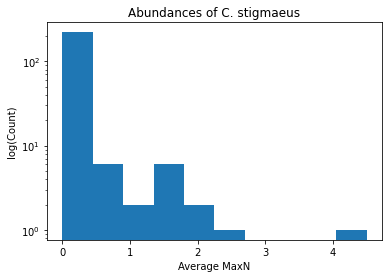

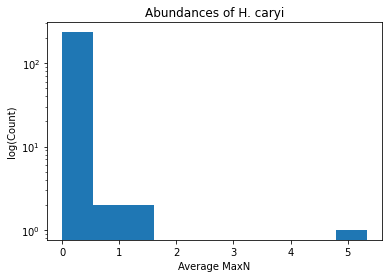

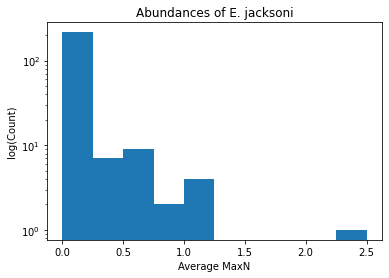

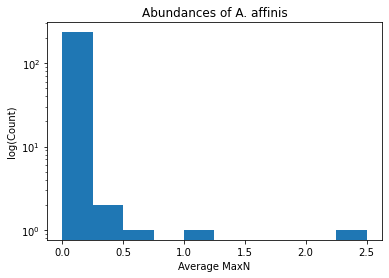

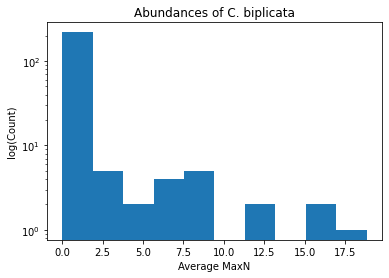

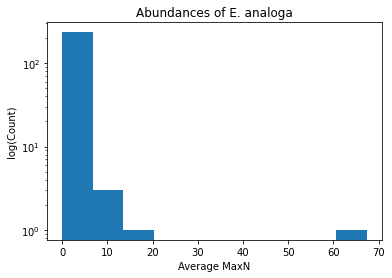

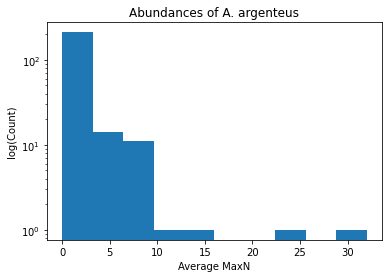

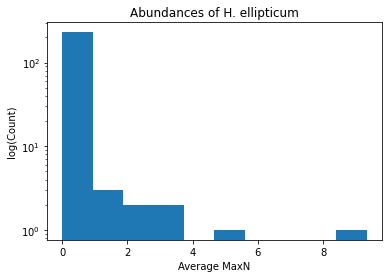

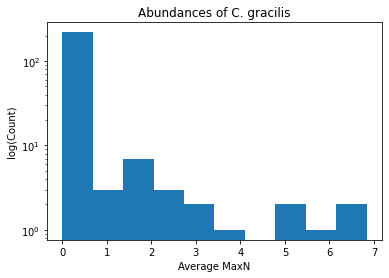

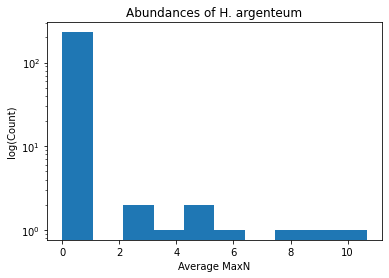

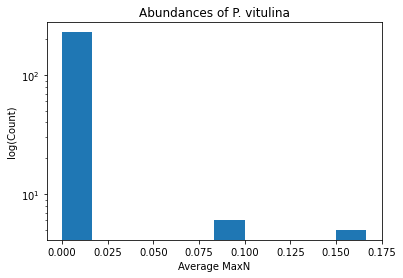

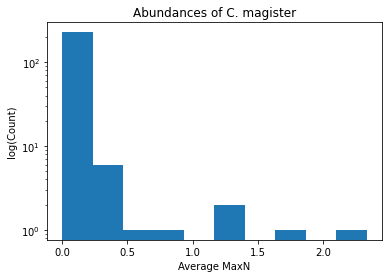

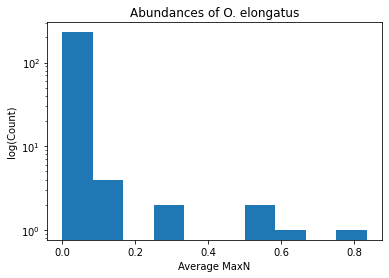

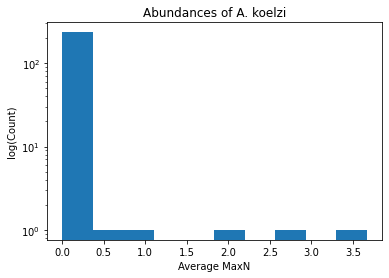

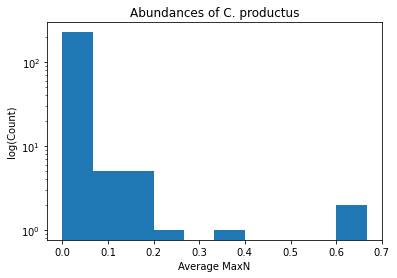

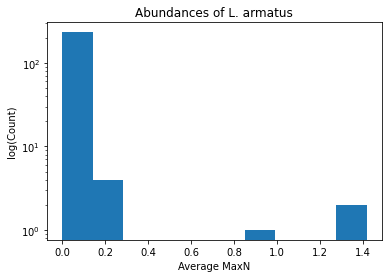

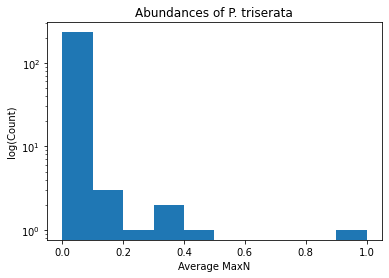

In [3]:
#create species list
species_list = pd.unique(df_merge['Sci_Name'])

#loop through all 17 species to see their distribution 
for i in species_list:
    plt.figure()
    df_spp = df_merge[df_merge['Sci_Name'] == i]
    plt.hist(df_spp['MaxN'])
    plt.yscale('log')
    plt.title(str("Abundances of " + i)) 
    plt.xlabel('Average MaxN')
    plt.ylabel('log(Count)')
    plt.savefig(str('figure/abundance_' + i + '.png'))

Based on the histrograms for all the species, it seems like a zero-inflated model is the most appropriate for the data. 

### Create stacked bar plot to view all the abundances

<ipython-input-4-800acaa4abbd>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = lab, rotation = 30)


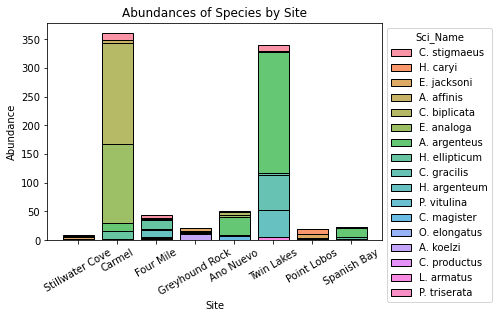

In [4]:
#create variable with unique site names
lab = pd.unique(df_merge['Site'])

#Stacked bar chart showing average MaxN value for each family and species
ax = sns.histplot(df_merge, x='Site', hue='Sci_Name', weights='MaxN',
             multiple='stack', shrink=0.8)
ax.set_ylabel('Abundance')
ax.set_xticklabels(labels = lab, rotation = 30)
ax.set_title('Abundances of Species by Site')
# Fix the legend so it's not on top of the bars
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
plt.savefig('figure/stacked_bar.png')


### Assess assumptions of Poisson and Negative Binomial Model

For the Poisson model, one assumption is that variance equals the means. The negative binomial model removes this assumptions and is better for overdispersed data.

In [5]:
#create a list of the functions to run
func_list = [np.mean, surfzone.variance]

#calculate mean and regression
df_merge.groupby(['Sci_Name'], as_index = False).agg({'MaxN':func_list})

Sci_Name      MaxN           
                       mean   variance
0      A. affinis  0.023958   0.032210
1    A. argenteus  1.144444  11.299159
2       A. koelzi  0.047917   0.110551
3    C. biplicata  0.768056   6.861537
4     C. gracilis  0.271528   0.971064
5     C. magister  0.049653   0.056996
6    C. productus  0.013194   0.004976
7    C. stigmaeus  0.131250   0.223630
8      E. analoga  0.593750  21.251454
9     E. jacksoni  0.074653   0.061296
10   H. argenteum  0.252431   1.499444
11       H. caryi  0.047222   0.139147
12  H. ellipticum  0.152431   0.608160
13     L. armatus  0.020486   0.020558
14   O. elongatus  0.015278   0.007579
15   P. triserata  0.014583   0.006442
16    P. vitulina  0.005556   0.000721

### Run Zero-Inflated Poisson Model on Species

In [6]:
#create empty dictionaries to store model results and rsme for each species
summary = {}
rsme = {}

#create for loop to go through 17 species and run zip using custom function from surfzone
for i in species_list:
    summary[i], rsme[i] = surfzone.zero_poisson(df_merge, i)

C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum L

         Current function value: 0.314916
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.377701
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
         Current function value: 0.182519
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.182957
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum L

         Current function value: 0.231917
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.234165
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.078548
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
         Current function value: 0.079017
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\discrete\count_model.py:504: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\discrete\count_model.py:512: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\discrete\count_model.py:513: RuntimeWarning: overflow encountered in square
  coeff**2)).sum() - (mu[nonzero_idx] * self.exog[nonzero_idx, i] *
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\discrete\count_model.py:512: RuntimeWarning: invalid value encountered in true_divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\gammo

         Current function value: 0.460822
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
         Current function value: 0.601098
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
         Current function value: 0.502136
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 46
         Current function value: 0.585529
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum L

         Current function value: 1.094034
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
         Current function value: 0.325995
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43
         Current function value: 0.394518
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.263261
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Like

         Current function value: 0.353260
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42
         Current function value: 0.215473
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.029276
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39

C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum L


         Current function value: 0.030246
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.174053
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
         Current function value: 0.192846
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum L

         Current function value: 0.093897
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
         Current function value: 0.094004
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.115253
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.115067
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum L

         Current function value: 0.067614
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.067606
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.065302
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.065647
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.038580
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.038765
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gammo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum L

In [7]:
#view RSME values for each species
rsme

{'C. stigmaeus': 0.08333333333333333,
 'H. caryi': 1.0,
 'E. jacksoni': 1.7380544678845173,
 'A. affinis': 0.0,
 'C. biplicata': 258.1898526278676,
 'E. analoga': 7.226974931924606,
 'A. argenteus': 20.100269484097304,
 'H. ellipticum': 6.128258770283412,
 'C. gracilis': 7.865183475997943,
 'H. argenteum': 11.14051664471227,
 'P. vitulina': 0.18633899812498247,
 'C. magister': 0.6066758241067098,
 'O. elongatus': 0.16666666666666666,
 'A. koelzi': 95.06503621790249,
 'C. productus': 0.0,
 'L. armatus': 1.4142135623730951,
 'P. triserata': 0.26352313834736496}

#### *A. argenteus*

In [8]:
#create variable for A. argenteus (barred surfperch)
species = 'A. argenteus'

print("RSME =", rsme[species])
summary[species]

RSME = 20.100269484097304


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3595
Time:                         22:57:02   Log-Likelihood:                -171.76
converged:                       False   LL-Null:                       -268.18
Covariance Type:             nonrobust   LLR p-value:                 3.786e-38
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
inflate_Intercept            0.2973      3.129      0.095      0.924      -5.835       6.430
inflate_Tide_height_ft       0.4903      0.349      1.406      0.160      -0.193       1.174
inflate_Wind_Average_mph    -0.2689      0.108     -2.488      0.013      -0.481      -0.057
inflate_Depth_ft            -0.0583      0.191     -0.305      0.760      -0.433       0.316
inflate_Visibility_ft       -0.0576      0.135     -0.427      0.669      -0.322       0.207
inflate_Temp_C               0.2816      0.198      1.423      0.155      -0.106       0.669
inflate_Breaker_Height_m    -1.3367      0.591     -2.263      0.024      -2.495      -0.179
inflate_Breaker_Period_s    -0.2052      0.072     -2.857      0.004      -0.346      -0.064
Intercept                   -3.6835      1.195     -3.084      0.002      -6.025      -1.342
Tide_height_ft              -0.5519      0.142     -3.887      0.000      -0.830      -0.274
Wind_Average_mph            -0.2030      0.031     -6.493      0.000      -0.264      -0.142
Depth_ft                    -0.1549      0.074     -2.093      0.036      -0.300      -0.010
Visibility_ft               -0.1853      0.051     -3.664      0.000      -0.284      -0.086
Temp_C                       0.4746      0.065      7.286      0.000       0.347       0.602
Breaker_Height_m             0.3052      0.263      1.159      0.247      -0.211       0.821
Breaker_Period_s             0.1377      0.030      4.630      0.000       0.079       0.196
============================================================================================
"""

#### *A. affinis*

In [9]:
#create variable for A. affinis (top smelt)
species = 'A. affinis'

print("RSME =", rsme[species])
summary[species]

RSME = 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3668
Time:                         22:57:02   Log-Likelihood:                -12.406
converged:                       False   LL-Null:                       -19.592
Covariance Type:             nonrobust   LLR p-value:                   0.04495
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -5.0704      6.136     -0.826      0.409     -17.096       6.955
Intercept           -3.9686      8.925     -0.445      0.657     -21.461      13.524
Tide_height_ft      -0.5815      0.896     -0.649      0.516      -2.338       1.175
Wind_Average_mph     0.0609      0.194      0.315      0.753      -0.319       0.440
Depth_ft             0.5890      0.568      1.037      0.300      -0.524       1.702
Visibility_ft        0.2723      0.204      1.337      0.181      -0.127       0.671
Temp_C              -0.3820      0.536     -0.713      0.476      -1.432       0.668
Breaker_Height_m    -0.7114      2.366     -0.301      0.764      -5.348       3.925
Breaker_Period_s     0.0879      0.266      0.331      0.741      -0.433       0.609
====================================================================================
"""

#### *A. koelzi*

In [10]:
#create variable for A. koelzi (Calico surfperch)
species = 'A. koelzi'

print("RSME =", rsme[species])
summary[species]

RSME = 95.06503621790249


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3227
Time:                         22:57:03   Log-Likelihood:                -18.066
converged:                       False   LL-Null:                       -26.673
Covariance Type:             nonrobust   LLR p-value:                   0.01606
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -0.3264      0.686     -0.476      0.634      -1.672       1.019
Intercept           -2.8050      7.852     -0.357      0.721     -18.194      12.584
Tide_height_ft       0.5367      0.993      0.540      0.589      -1.411       2.484
Wind_Average_mph    -0.0051      0.317     -0.016      0.987      -0.626       0.616
Depth_ft             1.5097      0.863      1.749      0.080      -0.182       3.201
Visibility_ft       -0.9770      0.561     -1.742      0.082      -2.076       0.122
Temp_C              -0.2595      0.349     -0.745      0.457      -0.943       0.424
Breaker_Height_m    -3.0987      2.080     -1.489      0.136      -7.176       0.979
Breaker_Period_s    -0.3802      0.263     -1.446      0.148      -0.896       0.135
====================================================================================
"""

#### *C. biplicata*

In [11]:
#create variable for C. biplicata (Purple olive snail)
species = 'C. biplicata'

print("RSME =", rsme[species])
summary[species]


RSME = 258.1898526278676


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3263
Time:                         22:57:02   Log-Likelihood:                -94.372
converged:                       False   LL-Null:                       -140.08
Covariance Type:             nonrobust   LLR p-value:                 6.316e-17
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const        1.5820        nan        nan        nan         nan         nan
Intercept           24.7332        nan        nan        nan         nan         nan
Tide_height_ft      -0.6286        nan        nan        nan         nan         nan
Wind_Average_mph    -0.1985        nan        nan        nan         nan         nan
Depth_ft             0.4291        nan        nan        nan         nan         nan
Visibility_ft       -0.0867        nan        nan        nan         nan         nan
Temp_C              -1.4797        nan        nan        nan         nan         nan
Breaker_Height_m    -2.9482        nan        nan        nan         nan         nan
Breaker_Period_s    -0.0331        nan        nan        nan         nan         nan
====================================================================================
"""

#### *C. gracilis*

In [12]:
#create variable for C. gracilis (Slender crab)
species = 'C. gracilis'

print("RSME =", rsme[species])
summary[species]

RSME = 7.865183475997943


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3787
Time:                         22:57:02   Log-Likelihood:                -55.462
converged:                       False   LL-Null:                       -89.263
Covariance Type:             nonrobust   LLR p-value:                 4.500e-12
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -6.3137        nan        nan        nan         nan         nan
Intercept          -16.5910        nan        nan        nan         nan         nan
Tide_height_ft      -2.0758        nan        nan        nan         nan         nan
Wind_Average_mph     0.0368        nan        nan        nan         nan         nan
Depth_ft             0.5611        nan        nan        nan         nan         nan
Visibility_ft        0.0271        nan        nan        nan         nan         nan
Temp_C               0.6068        nan        nan        nan         nan         nan
Breaker_Height_m     4.6957        nan        nan        nan         nan         nan
Breaker_Period_s     0.0490        nan        nan        nan         nan         nan
====================================================================================
"""

#### *C. magister*

In [13]:
#create variable for C. magister (Dungeness crab)
species = 'C. magister'

print("RSME =", rsme[species])
summary[species]

RSME = 0.6066758241067098


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.1798
Time:                         22:57:03   Log-Likelihood:                -30.277
converged:                       False   LL-Null:                       -36.913
Covariance Type:             nonrobust   LLR p-value:                   0.06573
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -6.2082      9.365     -0.663      0.507     -24.563      12.147
Intercept           -2.4891      4.605     -0.541      0.589     -11.515       6.537
Tide_height_ft      -0.7459      0.555     -1.344      0.179      -1.834       0.342
Wind_Average_mph     0.1247      0.098      1.268      0.205      -0.068       0.318
Depth_ft             0.3730      0.253      1.474      0.141      -0.123       0.869
Visibility_ft       -0.1540      0.154     -1.003      0.316      -0.455       0.147
Temp_C              -0.2750      0.271     -1.015      0.310      -0.806       0.256
Breaker_Height_m     0.6346      0.956      0.664      0.507      -1.239       2.509
Breaker_Period_s     0.1943      0.113      1.721      0.085      -0.027       0.416
====================================================================================
"""

#### *C. productus*

In [14]:
#create variable for C. producuts (Red rock crab)
species = 'C. productus'

print("RSME =", rsme[species])
summary[species]

RSME = 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                 0.08846
Time:                         22:57:03   Log-Likelihood:                -10.614
converged:                       False   LL-Null:                       -11.644
Covariance Type:             nonrobust   LLR p-value:                    0.9564
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -9.6184     39.029     -0.246      0.805     -86.113      66.877
Intercept           -3.8966      8.366     -0.466      0.641     -20.294      12.501
Tide_height_ft      -0.3750      1.021     -0.367      0.714      -2.377       1.627
Wind_Average_mph    -0.1051      0.240     -0.438      0.661      -0.575       0.365
Depth_ft             0.1143      0.503      0.227      0.820      -0.871       1.100
Visibility_ft        0.1449      0.226      0.642      0.521      -0.298       0.587
Temp_C              -0.0854      0.490     -0.174      0.862      -1.046       0.875
Breaker_Height_m     1.4108      1.743      0.810      0.418      -2.005       4.827
Breaker_Period_s    -0.1085      0.279     -0.389      0.697      -0.655       0.438
====================================================================================
"""

#### *C. stigmaeus*

In [15]:
#create variable for C. stigmaeus (Speckled sanddab)
species = 'C. stigmaeus'

print("RSME =", rsme[species])
summary[species]

RSME = 0.08333333333333333


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.1478
Time:                         22:57:01   Log-Likelihood:                -59.299
converged:                       False   LL-Null:                       -69.580
Covariance Type:             nonrobust   LLR p-value:                  0.004475
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const      -12.8884    217.498     -0.059      0.953    -439.177     413.400
Intercept           -5.8946      2.841     -2.075      0.038     -11.463      -0.327
Tide_height_ft      -0.0041      0.325     -0.012      0.990      -0.640       0.632
Wind_Average_mph     0.1112      0.069      1.617      0.106      -0.024       0.246
Depth_ft             0.3234      0.177      1.831      0.067      -0.023       0.670
Visibility_ft        0.0769      0.075      1.027      0.304      -0.070       0.224
Temp_C              -0.0075      0.159     -0.048      0.962      -0.318       0.303
Breaker_Height_m     1.4061      0.626      2.247      0.025       0.180       2.632
Breaker_Period_s    -0.0658      0.075     -0.873      0.383      -0.213       0.082
====================================================================================
"""

#### *E. analoga*

In [16]:
#create variable for E. analoga (sandcrab)
species = 'E. analoga'

print("RSME =", rsme[species])
summary[species]

RSME = 7.226974931924606


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.1823
Time:                         22:57:02   Log-Likelihood:                -91.928
converged:                       False   LL-Null:                       -112.42
Covariance Type:             nonrobust   LLR p-value:                 8.169e-07
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const        0.1576      0.295      0.535      0.593      -0.420       0.735
Intercept            8.2304      3.517      2.340      0.019       1.337      15.124
Tide_height_ft       1.1258      0.452      2.493      0.013       0.241       2.011
Wind_Average_mph     0.0292      0.089      0.329      0.742      -0.145       0.203
Depth_ft             0.5572      0.232      2.400      0.016       0.102       1.012
Visibility_ft        0.0801      0.118      0.680      0.496      -0.151       0.311
Temp_C              -1.0190      0.255     -3.993      0.000      -1.519      -0.519
Breaker_Height_m    -0.7661      0.728     -1.052      0.293      -2.194       0.662
Breaker_Period_s    -0.1287      0.084     -1.524      0.127      -0.294       0.037
====================================================================================
"""

#### *E. jacksoni*

In [17]:
#create variable for E. jacksoni (Black surfpearch)
species = 'E. jacksoni'

print("RSME =", rsme[species])
summary[species]

RSME = 1.7380544678845173


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.1733
Time:                         22:57:02   Log-Likelihood:                -36.764
converged:                       False   LL-Null:                       -44.473
Covariance Type:             nonrobust   LLR p-value:                   0.03099
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const      -19.6187   4332.774     -0.005      0.996   -8511.699    8472.462
Intercept            0.2480      3.176      0.078      0.938      -5.978       6.474
Tide_height_ft       0.3616      0.376      0.961      0.336      -0.376       1.099
Wind_Average_mph    -0.2870      0.178     -1.615      0.106      -0.635       0.061
Depth_ft            -0.5470      0.292     -1.877      0.061      -1.118       0.024
Visibility_ft        0.0573      0.101      0.569      0.569      -0.140       0.255
Temp_C               0.1255      0.180      0.699      0.485      -0.226       0.478
Breaker_Height_m    -0.5894      0.711     -0.829      0.407      -1.983       0.804
Breaker_Period_s    -0.1337      0.113     -1.179      0.238      -0.356       0.089
====================================================================================
"""

#### *H. argenteum*

In [18]:
#create variable for H. argenteum (Walleye surfpearch)
species = 'H. argenteum'

print("RSME =", rsme[species])
summary[species]

RSME = 11.14051664471227


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.6162
Time:                         22:57:02   Log-Likelihood:                -33.829
converged:                       False   LL-Null:                       -88.149
Covariance Type:             nonrobust   LLR p-value:                 1.758e-20
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
inflate_Intercept           -0.1743      9.534     -0.018      0.985     -18.860      18.511
inflate_Tide_height_ft      -5.7988      2.989     -1.940      0.052     -11.656       0.059
inflate_Wind_Average_mph     0.3268      0.506      0.646      0.518      -0.664       1.318
inflate_Depth_ft            -0.8642      0.838     -1.031      0.303      -2.507       0.779
inflate_Visibility_ft        0.6888      0.490      1.404      0.160      -0.272       1.650
inflate_Temp_C               0.8200      0.671      1.223      0.221      -0.494       2.134
inflate_Breaker_Height_m    -5.4902      2.805     -1.957      0.050     -10.987       0.007
inflate_Breaker_Period_s     0.2489      0.388      0.642      0.521      -0.511       1.009
Intercept                   -3.0482      3.924     -0.777      0.437     -10.739       4.643
Tide_height_ft              -2.6359      0.535     -4.931      0.000      -3.683      -1.588
Wind_Average_mph            -0.2108      0.111     -1.895      0.058      -0.429       0.007
Depth_ft                    -0.8132      0.238     -3.416      0.001      -1.280      -0.347
Visibility_ft                0.1976      0.178      1.113      0.266      -0.150       0.546
Temp_C                       0.4675      0.203      2.300      0.021       0.069       0.866
Breaker_Height_m             1.4669      0.671      2.187      0.029       0.152       2.782
Breaker_Period_s             0.3709      0.115      3.231      0.001       0.146       0.596
============================================================================================
"""

#### *H. caryi*

In [19]:
#create variable for H. caryi (Rainbow surfpearch)
species = 'H. caryi'

print("RSME =", rsme[species])
summary[species]

RSME = 1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3151
Time:                         22:57:01   Log-Likelihood:                -28.724
converged:                       False   LL-Null:                       -41.940
Covariance Type:             nonrobust   LLR p-value:                 0.0004216
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -3.6279      3.158     -1.149      0.251      -9.818       2.562
Intercept            1.0436      3.561      0.293      0.769      -5.936       8.023
Tide_height_ft       1.0188      0.592      1.721      0.085      -0.142       2.179
Wind_Average_mph     0.0787      0.085      0.925      0.355      -0.088       0.245
Depth_ft            -0.7972      0.426     -1.869      0.062      -1.633       0.039
Visibility_ft        0.1334      0.125      1.070      0.285      -0.111       0.378
Temp_C               0.0869      0.232      0.375      0.708      -0.368       0.541
Breaker_Height_m    -4.1045      1.683     -2.439      0.015      -7.403      -0.806
Breaker_Period_s    -0.1850      0.184     -1.008      0.314      -0.545       0.175
====================================================================================
"""

#### *H. ellipticum*

In [20]:
#create variable for H. ellipticum (Silver surfpearch)
species = 'H. ellipticum'

print("RSME =", rsme[species])
summary[species]

RSME = 6.128258770283412


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3174
Time:                         22:57:02   Log-Likelihood:                -61.939
converged:                       False   LL-Null:                       -90.743
Covariance Type:             nonrobust   LLR p-value:                 4.527e-10
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -0.4312      0.417     -1.033      0.301      -1.249       0.387
Intercept           -1.2911      3.030     -0.426      0.670      -7.229       4.647
Tide_height_ft       0.8979      0.483      1.861      0.063      -0.048       1.844
Wind_Average_mph     0.1332      0.080      1.668      0.095      -0.023       0.290
Depth_ft            -0.8993      0.229     -3.927      0.000      -1.348      -0.450
Visibility_ft        0.1440      0.103      1.403      0.161      -0.057       0.345
Temp_C               0.0773      0.165      0.467      0.640      -0.247       0.402
Breaker_Height_m     3.0099      0.735      4.097      0.000       1.570       4.450
Breaker_Period_s    -0.2630      0.091     -2.888      0.004      -0.442      -0.085
====================================================================================
"""

#### *L. armatus*

In [21]:
#create variable for L. armatus (Staghorn sculpin)
species = 'L. armatus'

print("RSME =", rsme[species])
summary[species]

RSME = 1.4142135623730951


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3525
Time:                         22:57:03   Log-Likelihood:                -10.307
converged:                       False   LL-Null:                       -15.918
Covariance Type:             nonrobust   LLR p-value:                    0.1292
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -4.9304      4.481     -1.100      0.271     -13.713       3.852
Intercept           -3.9485      9.419     -0.419      0.675     -22.409      14.512
Tide_height_ft      -2.7404      1.102     -2.486      0.013      -4.901      -0.580
Wind_Average_mph     0.0873      0.226      0.387      0.699      -0.355       0.530
Depth_ft             0.8710      0.595      1.463      0.143      -0.296       2.038
Visibility_ft       -0.2257      0.243     -0.929      0.353      -0.702       0.251
Temp_C              -0.3339      0.505     -0.661      0.509      -1.324       0.656
Breaker_Height_m     3.7845      1.999      1.893      0.058      -0.133       7.702
Breaker_Period_s    -0.0019      0.250     -0.008      0.994      -0.493       0.489
====================================================================================
"""

#### *O. elongatus*

In [22]:
#create variable for O. elongatus (Lingcod)
species = 'O. elongatus'

print("RSME =", rsme[species])
summary[species]

RSME = 0.16666666666666666


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                 0.07675
Time:                         22:57:03   Log-Likelihood:                -14.759
converged:                       False   LL-Null:                       -15.986
Covariance Type:             nonrobust   LLR p-value:                    0.9305
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -7.3816     16.718     -0.442      0.659     -40.148      25.385
Intercept           -3.5811      5.757     -0.622      0.534     -14.864       7.702
Tide_height_ft       0.3858      0.712      0.542      0.588      -1.010       1.781
Wind_Average_mph    -0.1000      0.231     -0.432      0.666      -0.554       0.354
Depth_ft            -0.1861      0.502     -0.370      0.711      -1.171       0.798
Visibility_ft       -0.1006      0.242     -0.416      0.677      -0.574       0.373
Temp_C               0.1726      0.318      0.543      0.587      -0.451       0.796
Breaker_Height_m    -0.8989      1.556     -0.578      0.563      -3.948       2.150
Breaker_Period_s    -0.1320      0.202     -0.655      0.513      -0.527       0.263
====================================================================================
"""

#### *P. triserata*

In [23]:
#create variable for P. triserata (Thornyback ray)
species = 'P. triserata'

print("RSME =", rsme[species])
summary[species]

RSME = 0.26352313834736496


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.3889
Time:                         22:57:03   Log-Likelihood:                -6.0861
converged:                       False   LL-Null:                       -9.9596
Covariance Type:             nonrobust   LLR p-value:                    0.3554
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -5.7675      6.767     -0.852      0.394     -19.031       7.496
Intercept           -4.2991     11.766     -0.365      0.715     -27.360      18.762
Tide_height_ft       1.1135      1.473      0.756      0.450      -1.773       4.000
Wind_Average_mph     0.0834      0.558      0.149      0.881      -1.011       1.178
Depth_ft            -0.2602      0.931     -0.279      0.780      -2.086       1.565
Visibility_ft       -0.9574      0.876     -1.093      0.274      -2.674       0.759
Temp_C               0.4594      0.777      0.592      0.554      -1.063       1.981
Breaker_Height_m    -0.4819      2.746     -0.175      0.861      -5.864       4.900
Breaker_Period_s    -0.8609      0.816     -1.055      0.291      -2.459       0.738
====================================================================================
"""

#### *P. vitulina*

In [24]:
#create variable for P. vitulina (harbor seal)
species = 'P. vitulina'

print("RSME =", rsme[species])
summary[species]

RSME = 0.18633899812498247


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                    MaxN   No. Observations:                  157
Model:             ZeroInflatedPoisson   Df Residuals:                      149
Method:                            MLE   Df Model:                            7
Date:                 Mon, 24 May 2021   Pseudo R-squ.:                  0.1499
Time:                         22:57:02   Log-Likelihood:                -4.7486
converged:                       False   LL-Null:                       -5.5857
Covariance Type:             nonrobust   LLR p-value:                    0.9757
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -4.5121      3.587     -1.258      0.208     -11.542       2.518
Intercept           -5.0195     20.170     -0.249      0.803     -44.551      34.512
Tide_height_ft      -1.4816      2.142     -0.692      0.489      -5.680       2.717
Wind_Average_mph    -0.7673      1.452     -0.528      0.597      -3.613       2.078
Depth_ft            -0.6191      1.085     -0.570      0.568      -2.746       1.508
Visibility_ft        0.2470      0.433      0.570      0.569      -0.603       1.097
Temp_C               0.2604      1.148      0.227      0.821      -1.989       2.510
Breaker_Height_m     0.1209      3.887      0.031      0.975      -7.498       7.740
Breaker_Period_s     0.2823      0.501      0.563      0.573      -0.700       1.264
====================================================================================
"""

### Results

Overall a model was able to be fit to 15 of the 17 species. The full model, using the data as for the inflation only worked for three species: *A. argenteus*, *E. analoga*, *H. argenteum*. These three species also had most environmental parameters being significant. For *A. argenteus*, the tide height, wind speed, visibility, temperature, and wave period had significant effects from the model. For *E analoga*, tide height, depth, visibility, temperature, and wave period had a significant effect. For *H ellipticum*, tide height, depth, temperature, and breaker height and period were significant. The root mean squared errors varied from 0 to 258. 

Of the parameters chosen in this model, all were significant for at least two separate species. Tide height was significant for two of the surfperch species and the sculpin species. Wind speed was significant for two surfperch species and the flatfish species. Depth was significant for one surfperch species and the mole crab. Visibility and temperature were significant for one surfperch species and the mole crab. Wave height was significant for one cancer crab species and the flatfish species. And wave period was significant with three surfperch species, a cancer crab species, and the mole crab. 

### Conclusion

The models yielded some interesting results. It seems that all the surfperch species aren't impacted by the same parameters, which you would expect for the same taxonomic family. They do occupy slightly different ecosystem niches in food selection, but all are found in the surf. Of the species the model wasn't able to be calculated for, two of the species were surfperch, one was a cancer crab, and the other was a snail species. These species are likely true residents of the surf zone and can be found in the surf regardless of any measurable conditions. Or there are other parameters which determine their presence that weren't tested in this model. 

For *A. argenteus*, the species showed a negative trend with tide height (as the tide height increases, there are fewer individuals observed), it would be expected the opposite would be true but this could be that more of the individuals are using the shallow water as shelter from predators, or more likely taken with the negative trend in visibility, the species could be predators, hunting in low tide and low visibility which would allow them to find and capture prey more easily. They exhibited a positive trend with temperature, so its likely the species might migrate to warmer, shallower waters. In addition to the shallow, warm water, the species had a positive trend with wave period and a negative trend with wind speed, so they prefer less windy, long period swell beaches. 

For *E. analoga*, the species had significant trends with tide height, depth, visibility, temperature, and wave period. There was a positive trend with tide height, depth, and visibility with a negative trend with temperature and breaker period. The species of mole crab is predominately confined to the swash zone, area of the beach where waves lap, but can be found to deeper depths (as observed on the BRUVS). The species prefers colder water, likely due to the additional nutrients and plankton associated with it. 

Based on the assumptions of the Poisson model that the mean is similar to the variance; this was not the case for all species. It is therefore more likely that a zero-inflated negative binomial model would've been more accurate for some of the species where there was a great difference between the mean and deviance. The root mean squared errors varied wildly and would be useful to compare with a zero-inflated negative binomial model for those species that had a greatly different mean and variance.

**Note on interpretation, seed was set in zero-inflated poisson model function after model was run and results and conclusion interpreted. Future results may differ.**

### Ideas for future work

The present analyses represent only 234 of the total 551 hours of BRUVS video recorded for the surf zone project. Additionally these results are only for the summer months (July, August, and September), so there isn't a great deal of varability between each sampling for these environmental parameters. The remainder of the video is taken throughout the year, when there are much greater difference in the oceanic conditions and will likely yield different results than represented here. As more video is analyzed, more individuals of these species and potentially other species will be recorded, so this could provide additional samples to analyze and species to draw trends for. 

Three of the species models weren't able to be run for this analyses. This is likely due to very poor model fit, but further investigation should be run to determine why these models weren't successful. The problem might be solved with the additional video analyzed are more of these species are observed and in different conditions, or the parameters presented here might not be the drivers for these species. Either way further investigation is necessary. 

Additional parameters should be recorded and added to the model. Salinity and wind direction could both be incredibly influential oceanic conditions that might influence surf zone assemblage. Salinity was recorded at some sites but was missing at most to the parameter was removed from the models. Wind direction can be used to determine upwelling favorable conditions, which can be hugely impactful on Central California species. The Iribarren number is useful in comparing the surface waves of different beaches and should also be included in future analyses as the types of beaches varied widely in this study and this could be a factor influencing the observed assemblage. The wrack in the water observed by the BRUV is also being recorded and analyzed separately. The results from this analysis could be added to these models and might show some significant results.


### References

Andrews HL (1945) The kelp beds of the Monterey region. Eco 26:24-37

Bennett BA, Attwood CG (1991) Evidence for recovery of a surf-zone fish assemblage following the establishment of a marine reserve on the southern coast of South Africa. Mar Ecol Prog Ser Oldendorf 75:173-181

Beyst B, Buysse D, Dewicke A, Mees J (2001) Surf zone hyperbenthos of Belgian sandy beaches: seasonal patterns. Estuar Coast Shelf Sci 53:877-896

Dugan JE, Defeo O, Jaramillo E, Jones AR, Lastra M, Nel R, Peterson CH, Scapini F, Schlacher T, Schoeman DS (2010) Give beach ecosystems their day in the sun. Sci 329:1146-1148

Dugan JE, Hubbard DM, McCrary MD, Pierson MO (2003) The response of macrofauna communities and shorebirds to macrophyte wrack subsidies on exposed sandy beaches of southern California. Estuar Coast Shelf Sci 58:25-40

Henderson CJ, Gilby BL, Schlacher TA, Connolly RM, Sheaves M, Maxwell PS, Flint N, Borland HP, Martin TS, Olds AD (2019) Low redundancy and complementarity shape ecosystem functioning in a low‐diversity ecosystem. J Anim Ecol

Krumhansl KA, Scheibling RE (2012) Production and fate of kelp detritus. Mar Ecol Prog Ser 467:281-302
Layman CA (2000) Fish assemblage structure of the shallow ocean surf-zone on the eastern shore of Virginia Barrier Islands. Estuar Coast Shelf Sci 51:201-213

Marin Jarrin JR, Teel DJ, Miller JA (2016) Stock-specific movement and distribution of juvenile chinook salmon, Oncorhynchus tshawytscha, in sandy beach surf zones of Oregon and Washington, USA. Estuaries and Coasts 39:759-766

McLachlan A, Brown A (2006) The Ecology of Sandy Shores, 2nd edn. Elsevier-Academic Press, Burlington, MA

Murphy HM, Jenkins GP (2010) Observational methods used in marine spatial monitoring of fishes and associated habitats: a review. Mar Freshw Res 61:236-252

Nakane Y, Suda Y, Hayakawa Y (2009) Predation pressure for a juvenile fish on an exposed sandy beach: comparison among beach types using tethering experiments. La mer 46:109-115

Nanami A, Endo T (2007) Seasonal dynamics of fish assemblage structures in a surf zone on an exposed sandy beach in Japan. Ichthyol Res 54:277-286

Olds AD, Vargas‐Fonseca E, Connolly RM, Gilby BL, Huijbers CM, Hyndes GA, Layman CA, Whitfield AK, Schlacher TA (2018) The ecology of fish in the surf zones of ocean beaches: A global review. Fish Fish 19:78-89

Ramp SR, Lermusiaux PF, Shulman I, Chao Y, Wolf RE, Bahr FL (2011) Oceanographic and atmospheric conditions on the continental shelf north of the Monterey Bay during August 2006. Dynamics of Atmospheres and Oceans 52:192-223

Ross ST, McMichael Jr RH, Ruple DL (1987) Seasonal and diel variation in the standing crop of fishes and macroinvertebrates from a Gulf of Mexico surf zone. Estuar Coast Shelf Sci 25:391-412

Ross SW, Lancaster JE (2002) Movements and site fidelity of two juvenile fish species using surf zone nursery habitats along the southeastern North Carolina coast. Environ Biol Fishes 63:161-172

Thompson SA, Sydeman WJ, Santora JA, Black BA, Suryan RM, Calambokidis J, Peterson WT, Bograd SJ (2012) Linking predators to seasonality of upwelling: using food web indicators and path analysis to infer trophic connections. Prog Oceanogr 101:106-120

Vargas‐Fonseca E, Olds AD, Gilby BL, Connolly RM, Schoeman DS, Huijbers CM, Hyndes GA, Schlacher TA (2016) Combined effects of urbanization and connectivity on iconic coastal fishes. Divers Distrib 22:1328-1341
